In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df=pd.read_csv('F:/DS/craigslist-used car raw data/vehicles.csv')

In [3]:
df.shape

(509577, 25)

In [4]:
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


In [5]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509577 entries, 0 to 509576
Data columns (total 25 columns):
id              509577 non-null int64
url             509577 non-null object
region          509577 non-null object
region_url      509577 non-null object
price           509577 non-null int64
year            508050 non-null float64
manufacturer    486813 non-null object
model           501588 non-null object
condition       277643 non-null object
cylinders       309894 non-null object
fuel            505592 non-null object
odometer        417253 non-null float64
title_status    506515 non-null object
transmission    505858 non-null object
vin             302152 non-null object
drive           365434 non-null object
size            167574 non-null object
type            368046 non-null object
paint_color     344871 non-null object
image_url       509563 non-null object
description     509561 non-null object
county          0 non-null float64
state           509577 non-null obj

In [6]:
#drop the useless column
drop_columns=['county','url','region_url','vin','image_url','fuel','cylinders','lat','long','state','description','size','type']
df=df.drop(columns=drop_columns)

In [7]:
#check the isnull number
df.isnull().sum()

id                   0
region               0
price                0
year              1527
manufacturer     22764
model             7989
condition       231934
odometer         92324
title_status      3062
transmission      3719
drive           144143
paint_color     164706
dtype: int64

In [8]:
#fillter the columns need to be filled by float and object
for n in df.drop(['manufacturer','model','paint_color'],axis=1).columns:
    if df[n].dtype=='float':
        df[n]=df[n].fillna(df[n].mean())
    if df[n].dtype=='object':
        df[n]=df[n].fillna(df[n].mode()[0])

In [9]:
#fill other columns
df['year']=df['year'].fillna(df['year'].mode()[0])
df['manufacturer']=df['manufacturer'].fillna('unkonwn')
df['model']=df['model'].fillna('unknown')
df['paint_color']=df['paint_color'].fillna('unknown')

In [10]:
#check the isnull number
df.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
odometer        0
title_status    0
transmission    0
drive           0
paint_color     0
dtype: int64

In [11]:
#replace the 0 value by median
df['price']=df['price'].replace(0,df['price'].median())
df['odometer']=df['odometer'].replace(0,df['odometer'].median())

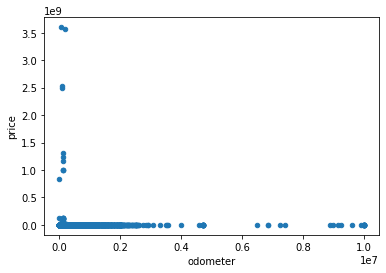

In [12]:
#check the fake max data
df.plot(kind='scatter',x='odometer',y='price')

In [13]:
#drop the fake max data
df1=df[df['price']<200000]
clean_data=df1[df1['odometer']<400000]

In [14]:
#replace the fake min data
clean_data['price']=clean_data['price'].replace(0,clean_data['price'].median())
clean_data['odometer']=clean_data['odometer'].replace(0,clean_data['odometer'].median())

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


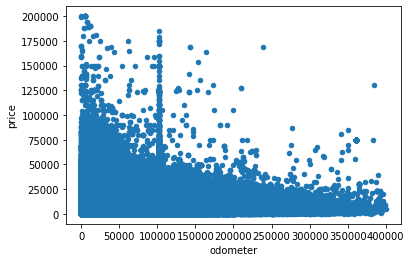

In [15]:
clean_data.plot(kind='scatter',x='odometer',y='price')

In [16]:
class_div=(clean_data['odometer'].max()-clean_data['odometer'].min())/3
class1=clean_data['odometer'].min()+class_div
class2=class1+class_div
class3=class2+class_div

In [17]:
print(class_div)
print(class1)
print(class2)
print(class3)
print(clean_data['odometer'].min)

133332.66666666666
133333.66666666666
266666.3333333333
399999.0
<bound method Series.min of 0          63500.0
1             10.0
2           7554.0
3             10.0
4          70150.0
            ...   
509572    103135.0
509573    108277.0
509574      6973.0
509575     37520.0
509576    152296.0
Name: odometer, Length: 508092, dtype: float64>


In [18]:
def odometer_class(n):
    if n<class1:
        return 'low odometer'
    if n>class1 and n<class2:
        return'medium odometer'
    else:
        return'high odometer'
clean_data['odometer_class']=clean_data['odometer'].apply(odometer_class)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
clean_data[['odometer_class','odometer','price']].head(10)

,odometer_class,odometer,price
0,low odometer,63500.0,17899
1,low odometer,10.0,9377
2,low odometer,7554.0,46463
3,low odometer,10.0,9377
4,low odometer,70150.0,49999
5,low odometer,120057.0,13999
6,low odometer,95484.0,34500
7,low odometer,89340.0,14500
8,medium odometer,226031.0,12500
9,low odometer,128153.0,34500


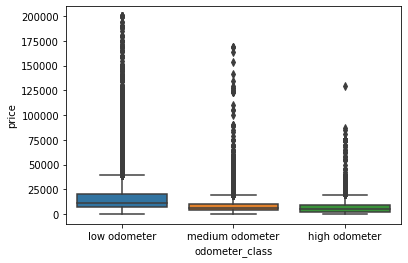

In [32]:
#detecting outlier by box chart
sns.boxplot(x='odometer_class', y='price', data=clean_data)

In [34]:
#get the iqr of price
from scipy.stats import iqr
iqr=iqr(clean_data['price'])
iqr

12218.5

In [37]:
price_stats=clean_data['price'].describe()
price_stats


count    508092.000000
mean      13260.830281
std       11173.090564
min           1.000000
25%        5731.500000
50%        9377.000000
75%       17950.000000
max      199997.000000
Name: price, dtype: float64

In [57]:
#get the upper and lower bound
Q3=price_stats['75%']
upper_bound=Q3+(iqr*1.5)
Q1=price_stats['25%']
lower_bound=Q1-(iqr*1.5)
print(upper_bound)
print(lower_bound)

36277.75
-12596.25


In [56]:
outlier_above=[n for n in clean_data['price'].values if n>upper_bound]
outlier_below=[m for m in clean_data['price'].values if m<lower_bound]

In [58]:
outlier_above

[46463,
 49999,
 63500,
 57995,
 39995,
 39995,
 43995,
 37995,
 43995,
 59995,
 37995,
 79997,
 44995,
 68500,
 105500,
 54997,
 36995,
 36995,
 37995,
 59995,
 49995,
 39999,
 49995,
 58995,
 38995,
 46995,
 56995,
 39900,
 36900,
 36495,
 36455,
 36795,
 42999,
 42999,
 36900,
 39000,
 39666,
 41900,
 39900,
 44500,
 44900,
 44200,
 49796,
 42655,
 41900,
 36455,
 36795,
 36495,
 57900,
 39666,
 48000,
 43995,
 41500,
 43995,
 37888,
 44995,
 36990,
 46000,
 38900,
 39900,
 41500,
 42995,
 37995,
 39995,
 38995,
 50995,
 41995,
 54990,
 37995,
 42995,
 42995,
 41950,
 40995,
 44995,
 39990,
 39990,
 44900,
 36995,
 36900,
 60000,
 39944,
 39998,
 39998,
 39995,
 42800,
 52900,
 37700,
 40500,
 37500,
 45990,
 123456,
 37995,
 41000,
 59000,
 63944,
 54995,
 42990,
 40944,
 39998,
 39998,
 55990,
 39990,
 42990,
 42900,
 37888,
 38888,
 37888,
 39990,
 36490,
 54990,
 36990,
 38990,
 46000,
 39990,
 42990,
 59000,
 41000,
 44990,
 46990,
 39944,
 39998,
 44995,
 39998,
 46999,
 36900